In [416]:
!pip install graphviz
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [417]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from anytree import Node as Node_anytree, RenderTree
from anytree.exporter import DotExporter
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


In [418]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def find_metrics(name,y_true, y_pred):
    acc_my_machine = accuracy_score(y_true, y_pred)
    precision_my_machine = precision_score(y_true, y_pred)
    recall_my_machine = recall_score(y_true, y_pred)
    F1_Measure_my_machine = (2*precision_my_machine * recall_my_machine)/(precision_my_machine + recall_my_machine)
    if name != "NO_PRINT":
        print(f"acc_{name} : {acc_my_machine:.3f} \nprecision_{name} : {precision_my_machine:.3f}\nrecall_{name} :{recall_my_machine:.3f}\nF1_Measure_{name} : {F1_Measure_my_machine:.3f}")

    return acc_my_machine,precision_my_machine,recall_my_machine,F1_Measure_my_machine

In [419]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_metrics_and_RocCurve_confusion_matrix(y_pred,y_pred_binary,y_true,name,label_0,label_1):


    RocCurveDisplay.from_predictions(
    y_true,
    y_pred,
    name=f"rocCurve",
    color="darkorange",)
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("show rocCurve")
    plt.legend()
    plt.show()

    find_metrics(name,y_true, y_pred_binary)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=[label_0,label_1])
    cmd.plot()



In [420]:
data = pd.read_csv("part2.csv")
data.head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [421]:
data = data.drop(['Unnamed: 32'], axis=1)
data = data.drop(['id'],axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head(12)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [422]:
diagnosis = data['diagnosis']
features = data.drop(['diagnosis'], axis = 1)
features.head(12)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [423]:
print(len(features))

569


In [424]:
from sklearn.model_selection import train_test_split# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,   
    diagnosis, test_size=0.25, random_state=42)

In [425]:
def post_prune_tree(decision_tree,alph):

    root_depth = decision_tree.root.find_depth_tree()
    print(f"before main_tree_root_depth : {root_depth}")
    root_number_leaves = decision_tree.root.find_leaves()
    print(f"before main_tree_root_number_leaves : {root_number_leaves}")
    emperical_erro = decision_tree.find_emperical_error()
    print(f"before main_tree_root_emperical_erro : {emperical_erro}")
    main_tree_complexity = emperical_erro + alph * root_number_leaves 
    
    emperical_erro = decision_tree.find_emperical_error()
    root_number_depth = decision_tree.root.find_depth_tree()
    root_number_leaves = decision_tree.root.find_leaves()

    while True:
        k = 0
        list_of_gain_each_child = []
        for child in decision_tree.root.childs:
            k += 1
            if not child.is_leaf():
              
                gain,best_child = child.best_del_achivement(alph)
                list_of_gain_each_child.append([gain,k,best_child])

        if len(list_of_gain_each_child) == 0:
          print("I cant find any good point1")
          break
          
        for item in list_of_gain_each_child:
            number_success = 0
            if item[0] < 0 :
                number_success += 1
                item[2].leaf = True
        if number_success == 0 :
            print("I cant find any good point2")
            break
        print(f"before main_tree_complexity : {main_tree_complexity}")
        main_tree_complexity = emperical_erro + alph * root_number_leaves 
        print(f"after main_tree_complexity : {main_tree_complexity}")
        emperical_erro = decision_tree.find_emperical_error()
        print(f"after main_tree_emperical_error : {emperical_erro}")
        root_number_depth = decision_tree.root.find_depth_tree()
        print(f"after main_tree_root_number_depth : {root_number_depth}")
        root_number_leaves = decision_tree.root.find_leaves()
        print(f"after main_tree_root_number_leaves : {root_number_leaves}")
    return decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves

In [426]:
def make_node(dictionary_tree,father=None):
   
    if dictionary_tree['child'] == None:
        return Node_anytree(dictionary_tree['text'],parent=father)
    else:
        
        if father is None:
               root =  Node_anytree(dictionary_tree['text'])
        else:
               root = Node_anytree(dictionary_tree['text'],parent=father)
        
        for item in dictionary_tree['child']:
            make_node(item,father=root)
    
    return root

In [427]:
import numpy as np 
 
class Node_tree: 
    def __init__(self,feature_name=None,
                 feature_index=None,
                 threshold=None, 
                 left=None,
                 right=None, 
                 entropy=None,
                 number_of_left_child=None,
                 number_of_right_child=None,
                 choice_from_father = None,
                 emprical_error = None,
                 value=None,
                 leaf = False): 


        self.feature_name = feature_name
        self.feature_index = feature_index  # Index of the feature to split on 
        self.threshold = threshold          # Threshold value to split the feature on 
        self.left = left                    # Left subtree 
        self.right = right                  # Right subtree 

        self.number_of_left_child = number_of_left_child
        self.number_of_right_child = number_of_right_child
        self.choice_from_father = choice_from_father
        self.childs = []
        if left is None and right is None :
             pass
        elif left is not None and right is None :
            self.childs.append(left)
        elif left is None and right is not None :
            self.childs.append(right)
        else :
            self.childs.append(left)
            self.childs.append(right)

        self.emprical_error = emprical_error
        self.entropy = entropy              # Entropy impurity of the split 
        self.value = value                  # value
        self.leaf = leaf

    def is_leaf(self):
        return self.leaf
    
    def show_node(self):
      enter = '\n'
      if self.is_leaf():
        print(self.choice_from_father)
        return {"text":f"{self.choice_from_father} = {self.value}","child":None}
      else :
        
        list_of_show_child =[]
        list_of_show_child.append(self.left.show_node())
        list_of_show_child.append(self.right.show_node())
        
        return {"text":f"{self.choice_from_father} _ {self.feature_name}","child": list_of_show_child}
    

    def make_plot(self,name="Tree.png"):

        show_node_in_dic = self.show_node()
        
        root = make_node(show_node_in_dic)

        DotExporter(root).to_picture(name)

 

    def find_depth_tree(self):
      
      if self.is_leaf():
          return 1
      else :
          max_depth = 0
          for child in self.childs :
              depth = 1+child.find_depth_tree()

              if max_depth < depth :
                  max_depth = depth
          
          return max_depth


    def find_leaves(self):

      if self.is_leaf():
          return 1
      else :

          leaves = 0
          for child in self.childs :
              leaves += child.find_leaves()

          return leaves


    def best_del_achivement(self,alph):

        
        is_all_of_its_child_leaf = True

        for child in self.childs :

            if not child.is_leaf():
              
                is_all_of_its_child_leaf  = False
                break

        
        if is_all_of_its_child_leaf:

            child_erro = 0

            for child in self.childs:
              child_erro += child.emprical_error

            return (self.emprical_error -  child_erro) - (alph*(len(self.childs)-1)),self
        
        else:
              best_achivement = np.inf
              best_child_for_del = None
              for child in self.childs:
                  if not child.is_leaf():
                      child_achivement,child = child.best_del_achivement(alph)
                  
                      if best_achivement > child_achivement:
                          best_achivement = child_achivement
                          best_child_for_del = child
              return best_achivement,best_child_for_del



 
class DecisionTree_with_thershold_entropy: 
    def __init__(self,list_feature,min_samples_split=2, max_depth=2,min_entropy=0): 
        self.min_samples_split = min_samples_split  # Minimum number of samples to split a node 
        self.max_depth = max_depth                  # Maximum depth of the tree 
        self.root = None                            # Root node of the tree 
        self.list_feature = list_feature
        self.min_entropy = min_entropy

    def fit(self, X, y): 

        self.root = self._grow_tree(X, y) 
     
    def predict(self, X): 
        return np.array([self._traverse_tree(x, self.root) for x in X]) 
     
    def _grow_tree(self, X, y,father_probabilty=1/2,choice_from_father='root',depth=0): 
        n_samples, n_features = X.shape 
        n_labels = len(np.unique(y)) 
         
        # Stopping criteria 
        if (depth >= self.max_depth
            or  self._entropy(y) <= self.min_entropy
            or n_labels == 1 
            or n_samples < self.min_samples_split): 
            leaf_value = self._fidn_probability_of_pasative(y,father_probabilty) 
            if leaf_value > 0.5 :
                emprical_error = len(y) * (1-leaf_value)
            else :
                 emprical_error = len(y) * (leaf_value)
            return Node_tree(value=leaf_value,
                             choice_from_father=choice_from_father,
                             leaf = True,
                             entropy = self._entropy(y),
                             emprical_error = emprical_error
                             ) 

        leaf_value = self._fidn_probability_of_pasative(y,father_probabilty) 
        if leaf_value > 0.5 :
              emprical_error = len(y) * (1-leaf_value)
        else :
              emprical_error = len(y) * (leaf_value)

        best_entropy = -np.inf 
        best_feature_index = None 
        best_threshold = None 
        for feature_index in range(n_features): 
            thresholds = np.unique(X[:, feature_index]) 
            for threshold in thresholds: 
                left_indices = np.where(X[:, feature_index] <= threshold)[0] 
                right_indices = np.where(X[:, feature_index] > threshold)[0] 
                if len(left_indices) > 0 and len(right_indices) > 0: 
                    y_left = y[left_indices] 
                    y_right = y[right_indices] 
                    entropy_gain = self._entropy(y) - self._find_Remainder(y_left, y_right) 
                    if entropy_gain > best_entropy: 
                        best_entropy = entropy_gain 
                        best_feature_index = feature_index 
                        best_threshold = threshold 
                        best_left_indices = left_indices 
                        best_right_indices = right_indices 
        

        choice_from_father_left = f'value <= {threshold:.2f}'
        choice_from_father_right = f'{threshold:.2f} > value'
        # Split recursively on best feature and threshold 
        left = self._grow_tree(X[best_left_indices, :], y[best_left_indices],leaf_value,choice_from_father_left ,depth+1) 
        right = self._grow_tree(X[best_right_indices, :], y[best_right_indices],leaf_value,choice_from_father_right,depth+1) 
        return Node_tree(feature_name=self.list_feature[best_feature_index],
                         feature_index=best_feature_index,
                         threshold=best_threshold, 
                         left=left, right=right, 
                         entropy = self._entropy(y),
                         choice_from_father=choice_from_father,
                         value = leaf_value,
                         emprical_error = emprical_error,
                         leaf = False
                         ) 
     

    def find_emperical_error(self,node=None):
        if node is None :
          node =self.root

        if node.is_leaf():
            return node.emprical_error
        
        emp_error = 0
        for child in node.childs:
            emp_error += self.find_emperical_error(child)
        return emp_error

    def _traverse_tree(self, x, node): 
        if node.is_leaf(): 
          
            return node.value 

        if x[node.feature_index] <= node.threshold: 
            return self._traverse_tree(x, node.left) 
        else: 
            return self._traverse_tree(x, node.right) 
     
    def _find_Remainder(self, y_left, y_right):
        if len(y_right) == 0:
           return self._entropy(y_left)
        n_left, n_right = len(y_left), len(y_right) 
        
        entropy_left = self._entropy(y_left)
        entropy_right = self._entropy(y_right)
        entropy = (n_left / (n_left + n_right)) * entropy_left + (n_right / (n_left + n_right)) * entropy_right 
        return entropy

    def _entropy(self,y):
        if len(y)==0:
          return 0
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy


                                        
    def _fidn_probability_of_pasative(self, y,perobabilty_of_pasetive_of_father=1/2): 
          unique_list, counts = np.unique(y, return_counts=True)

           
          if len(unique_list) == 1:

            if unique_list[0] == 1:

                return 1
            
            else:

                return 0

          if unique_list[0] == 1:
              number_pos = counts[0]
            
          else :
              number_pos = counts[1]

            
          if number_pos / (counts[0]+counts[1]) == 0.5:

              return perobabilty_of_pasetive_of_father

          else :

              return number_pos / (counts[0]+counts[1])

    def predict_by_thershold_out_put(self,X,thershold):

        predict = self.predict(X)
        res = []
        for i in predict:
          if i >= thershold:
            res.append(1)
          else:
            res.append(0)
        return np.array(res)

    def tree_show(self):
      
        return self.root.show_node()

    def make_plot(self,name):

        return self.root.make_plot(name)


In [428]:
np_train_x = X_train.to_numpy()
np_label_train = y_train.to_numpy()

thershold_entropy = DecisionTree_with_thershold_entropy(X_train.columns,max_depth=3)
thershold_entropy.fit(np_train_x,np_label_train)

In [435]:
thershold_entropy.make_plot('Thershold_tree_entropy.png')

value <= 0.15
0.15 > value
value <= 0.10
0.10 > value
value <= 0.17
0.17 > value
0.17 > value


In [430]:
thershold_entropy.root.find_depth_tree()

4

In [431]:
thershold_entropy.root.find_leaves()

7

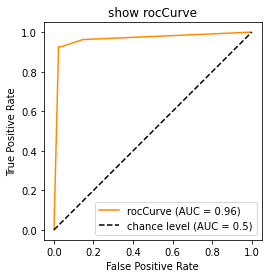

acc_my machin : 0.951 
precision_my machin : 0.943
recall_my machin :0.926
F1_Measure_my machin : 0.935


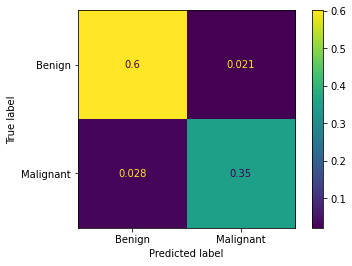

In [432]:
thershold_entropy_y_pred_bin = thershold_entropy.predict_by_thershold_out_put(X_test.to_numpy(),0.5)
thershold_entropy_pred = thershold_entropy.predict(X_test.to_numpy())
show_metrics_and_RocCurve_confusion_matrix(thershold_entropy_pred,thershold_entropy_y_pred_bin,y_test.to_numpy(),"my machin","Benign","Malignant")

In [433]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def make_plot_to_find_best_alpha(model,X_validation,Y_validation):

        random_alpha_numbers = np.sort(np.random.choice(
        range(1, 100),
        60,
        replace=False) * (1/100))


        random_alpha_numbers = np.insert(random_alpha_numbers, 0, 0)

        list_of_model = [copy.deepcopy(model) for item in random_alpha_numbers]

        list_of_depth = []
        list_of_leaves = []
        list_of_accuracy = []
        list_of_f1_score = []
        list_of_emperical_error = []
        list_of_main_tree_complexity =[]
        k = 0
        for alpha in random_alpha_numbers:
            # print(alpha)
            model = list_of_model[k]
            print("###############################################################")
            decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves = post_prune_tree(model,alpha)
            print("###############################################################")
            list_of_depth.append(root_number_depth)
            list_of_leaves.append(root_number_leaves)
            list_of_emperical_error.append(emperical_erro)
            list_of_main_tree_complexity.append(main_tree_complexity)

            y_pred = decision_tree.predict_by_thershold_out_put(X_validation,0.5)
            acc_my_machine,precision_my_machine,recall_my_machine,F1_Measure_my_machine = find_metrics("NO_PRINT",Y_validation, y_pred)
            list_of_accuracy.append(acc_my_machine)
            list_of_f1_score.append(F1_Measure_my_machine)
            k += 1


        xpoints = random_alpha_numbers
        ypoints = np.array(list_of_depth)
        plt.title('changing alpha and effect of depth')
        plt.plot(xpoints, ypoints)
        plt.show()

        ypoints2 = np.array(list_of_leaves)
        plt.title('changing alpha and effect of leaves')
        plt.plot(xpoints, ypoints2)
        plt.show()


        ypoints3 = np.array(list_of_emperical_error)
        plt.title('changing alpha and effect of emperical error')
        plt.plot(xpoints, ypoints3)
        plt.show()


        # ypoint4 = np.array(list_of_main_tree_complexity)
        # plt.title('changing alpha and effect of main formula I define')
        # plt.plot(xpoints, ypoint4)
        # plt.show()

        ypoint5 = np.array(list_of_accuracy)
        plt.title('changing alpha and effect on accuracy')
        plt.plot(xpoints, ypoint5)
        plt.show()


        ypoint6 = np.array(list_of_f1_score)
        plt.title('changing alpha and effect on f1 score')
        plt.plot(xpoints, ypoint6)
        plt.show()



###############################################################
before main_tree_root_depth : 4
before main_tree_root_number_leaves : 7
before main_tree_root_emperical_erro : 8.0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 4
before main_tree_root_number_leaves : 7
before main_tree_root_emperical_erro : 8.0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 4
before main_tree_root_number_leaves : 7
before main_tree_root_emperical_erro : 8.0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 4
before main_tree_root_number_leaves : 7
before main_tree_root_emperical_erro : 8.0
I cant f

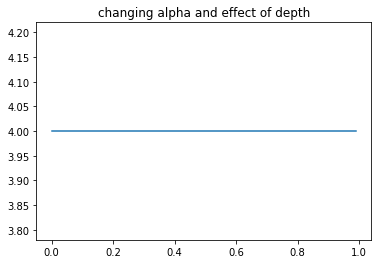

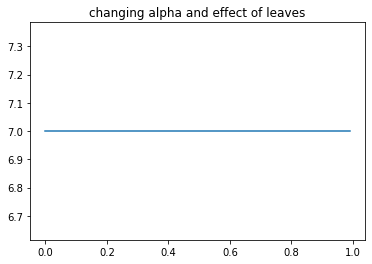

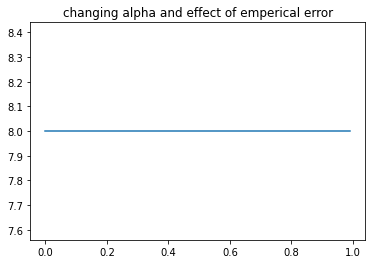

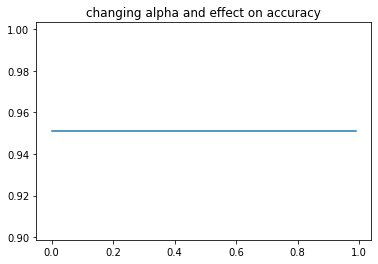

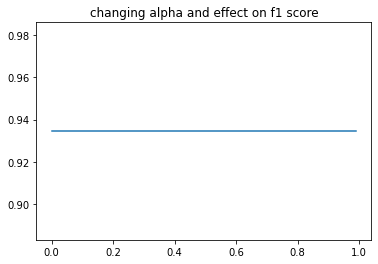

In [434]:
make_plot_to_find_best_alpha(thershold_entropy,X_test.to_numpy(),y_test.to_numpy())